In [1]:
from approximations import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pickle

In [3]:
with open('results_MSB_paramgrid_500.pkl', 'rb') as f:
    param_grid, results_msb = pickle.load(f)
    
noise_levels = np.logspace(-6, np.log(0.5), 500)

# helper functions to calculate frequencies of m1 and M1 from simulation

genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))

def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

In [4]:
def calculate_pR(genotype_names, pop_vec):
    
    m1 = baseline_single_mut(genotype_names, pop_vec)
    m0 = pop_vec[0]
    
    return(m1/m0)

## 1A) Comparison for pR composite functions

In [6]:
def pS_minus(mu, tau, s):
    
    return(np.exp(-mu/s))

def pS_plus(mu, tau, s):
    
    return(np.exp(-(0.5*mu + 0.5*mu*tau) / s))

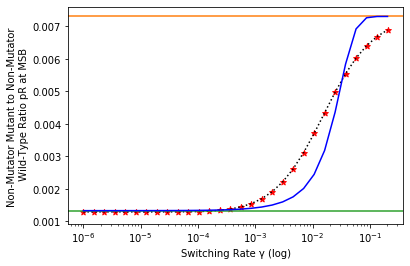

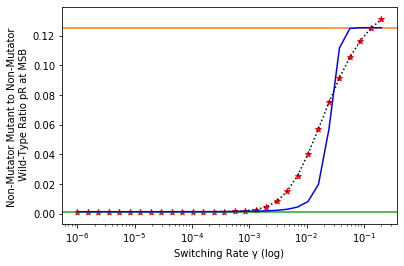

In [4]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    pR_sim = [calculate_pR(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    # approximations
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    pR_approx = [R_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, pR_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, pR_sim, marker = '*', c = 'r')
    
    ax.axhline(1-pS_minus(mu, tau, s), c = 'C2')
    ax.axhline(1-pS_plus(mu, tau, s), c = 'C1')
    
    ax.plot(noise_levels, pR_approx, c = 'b')

    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Non-Mutator Mutant to Non-Mutator \n Wild-Type Ratio pR at MSB')
    
    ax.set_xscale('log')
    
    plt.savefig('pR_composite_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg', bbox_inches='tight')
    
    plt.show()

## 1B) Comparison for pR whole function

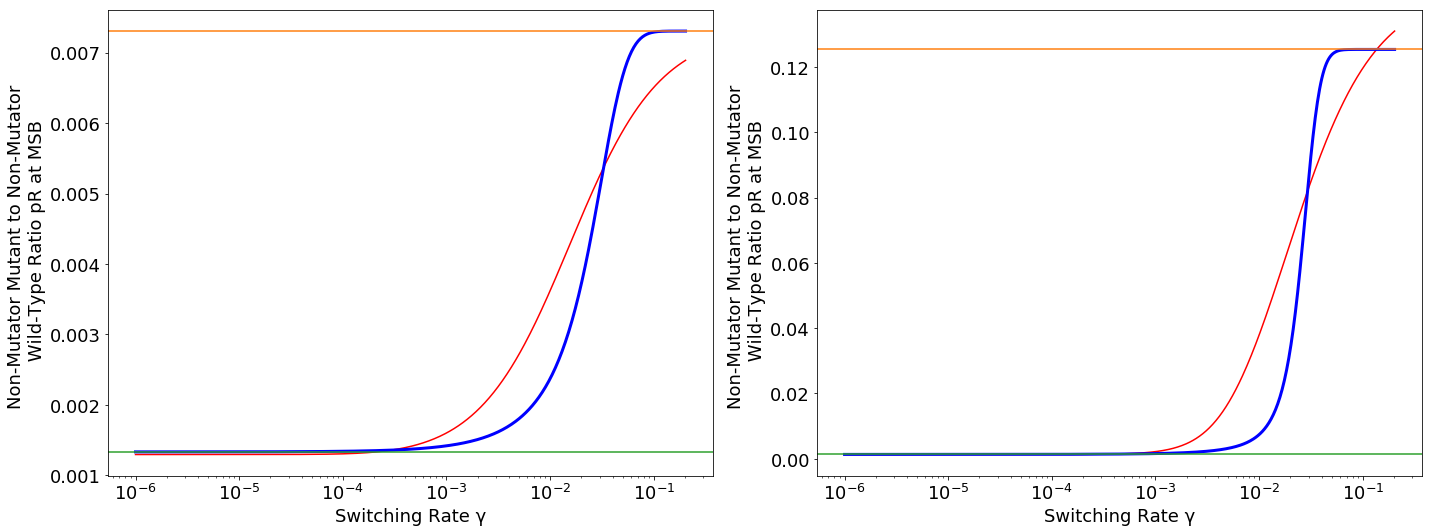

In [9]:
plot_params = [6,8]
fig, ax = plt.subplots(1,2,figsize = (20,7.5))

for n in plot_params:
    
    nind = plot_params.index(n)
    
    # from simulation 
    pR_sim = [calculate_pR(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    # approximations
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    pR_approx = [R_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    ax[nind].plot(noise_levels, pR_sim, c = 'red')
    #ax[nind].scatter(noise_levels, pR_sim, marker = '*', c = 'r', s = 200.)
    
    ax[nind].plot(noise_levels, pR_approx, c = 'b', linewidth = 3.)

    ax[nind].set_xlabel('Switching Rate γ', fontsize = 18)
    ax[nind].set_ylabel('Non-Mutator Mutant to Non-Mutator \n Wild-Type Ratio pR at MSB', fontsize = 18)
    
    ax[nind].set_xscale('log')
    
    ax[nind].axhline(1-pS_minus(mu, tau, s), c = 'C2')
    ax[nind].axhline(1-pS_plus(mu, tau, s), c = 'C1')
    
        
    ax[nind].tick_params(labelsize=18)
    
    
plt.tight_layout()

plt.savefig('pR_comparison_two_panels_new.jpg', dpi = 400)

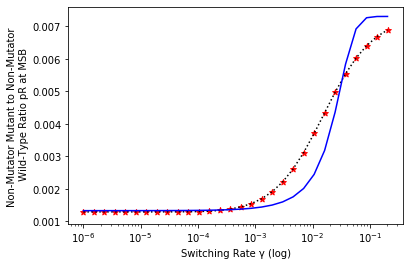

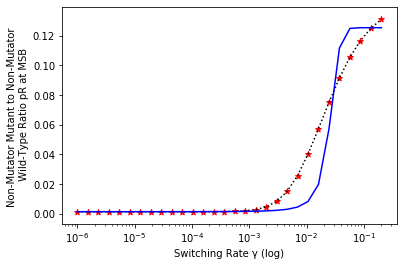

In [5]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    pR_sim = [calculate_pR(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    # approximations
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    pR_approx = [R_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, pR_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, pR_sim, marker = '*', c = 'r')
    
    ax.plot(noise_levels, pR_approx, c = 'b')

    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Non-Mutator Mutant to Non-Mutator \n Wild-Type Ratio pR at MSB')
    
    ax.set_xscale('log')
    
    plt.savefig('pR_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg')
    
    plt.show()

In [9]:
plot_params = [6,8]

for n in plot_params:
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    # pR
    
    # from simulation 
    pR_sim = [calculate_pR(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    # from approximation
    pR_approx = [R_function(noise, mu, tau, s) for noise in noise_levels]
    
    print('For mu = ' + str(mu)  + ' tau = '+ str(tau) + ' s = ' + str(s) +':')
    print('Corr R2 pR is ' + str(scipy.stats.pearsonr(np.array(pR_sim), pR_approx)[0]**2))

For mu = 4.000000000000001e-05 tau = 10 s = 0.03:
Corr R2 pR is 0.9427733541205892
For mu = 4.000000000000001e-05 tau = 200 s = 0.03:
Corr R2 pR is 0.9343352767227674
